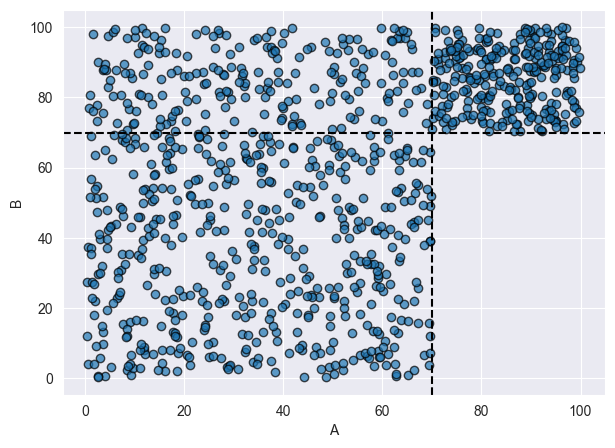

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import FIRM.base.ct_fuzzy_rule as fuzzy_rule
import FIRM.base.operators.implications as implications
import FIRM.base.operators.tnorms as tnorms
import FIRM.base.fuzzy_data as fuzzy_data

np.random.seed(42)

n = 1000

# Generate A between 0 and 100
A = np.random.uniform(0, 100, n)

# Generate B depending on A
B = []
for a in A:
    if a > 70:  # if A is high
        b = np.random.uniform(70, 100)  # force B high
    else:
        b = np.random.uniform(0, 100)   # otherwise B can be anything
    B.append(b)

df = pd.DataFrame({"A": A, "B": B})

# --- Plot ---
plt.figure(figsize=(7,5))
plt.scatter(df["A"], df["B"], alpha=0.7, edgecolor="k")
plt.axvline(70, color="black", linestyle="--")
plt.axhline(70, color="black", linestyle="--")
plt.xlabel("A")
plt.ylabel("B")
plt.show()

In [2]:
dataset = df[['A', 'B']]
fuzzy_dataset = fuzzy_data.FuzzyDataQuantiles('symmetric',dataset, 3, ['L', 'M', 'H'])

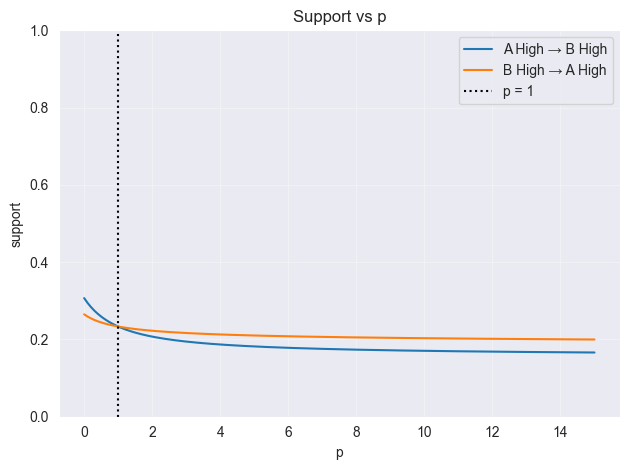

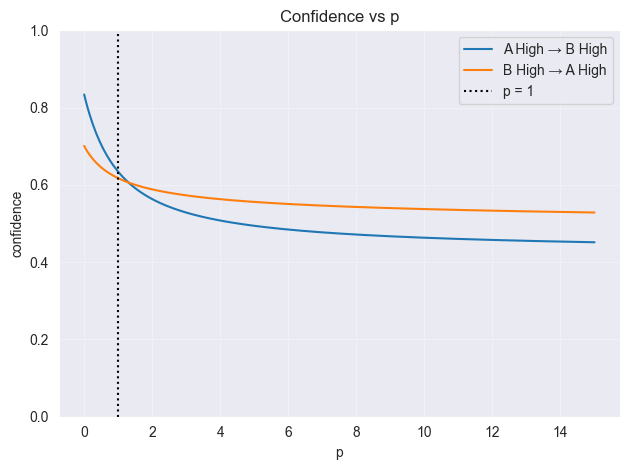

In [3]:
T = lambda x, y: np.maximum(x + y - 1, 0)

rule1 = fuzzy_rule.CRFuzzyRule([(0, 2), (1, 2)])
rule2 = fuzzy_rule.CRFuzzyRule([(1, 2), (0, 2)])

def eval_rules_at_p(p, dataset, fuzzy_dataset):
    I = lambda x, y: 1 - x + x * (y**p)
    rule1.evaluate_rule_database(dataset, fuzzy_dataset, T, I)
    rule2.evaluate_rule_database(dataset, fuzzy_dataset, T, I)
    return {
        "p": p,
        "supp_r1": rule1.fsupport(),
        "supp_r2": rule2.fsupport(),
        "conf_r1": rule1.fconfidence(),
        "conf_r2": rule2.fconfidence(),
    }

p_values = np.linspace(0.0001, 15, 300)

traj = [eval_rules_at_p(p, dataset, fuzzy_dataset) for p in p_values]

p_arr = np.array([t["p"] for t in traj])
supp_r1 = np.array([t["supp_r1"] for t in traj])
supp_r2 = np.array([t["supp_r2"] for t in traj])
conf_r1 = np.array([t["conf_r1"] for t in traj])
conf_r2 = np.array([t["conf_r2"] for t in traj])

# ---- plots ----
plt.figure()
plt.plot(p_arr, supp_r1, label="A High → B High")
plt.plot(p_arr, supp_r2, label="B High → A High")
plt.axvline(1, color="black", linestyle=":", label="p = 1")  # vertical line at p=1
plt.xlabel("p")
plt.ylabel("support")
plt.title("Support vs p")
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1) 
plt.tight_layout()

plt.figure()
plt.plot(p_arr, conf_r1, label="A High → B High")
plt.plot(p_arr, conf_r2, label="B High → A High")
plt.axvline(1, color="black", linestyle=":", label="p = 1")  # vertical line at p=1
plt.xlabel("p")
plt.ylabel("confidence")
plt.title("Confidence vs p")
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0,1) 
plt.tight_layout()

plt.show()

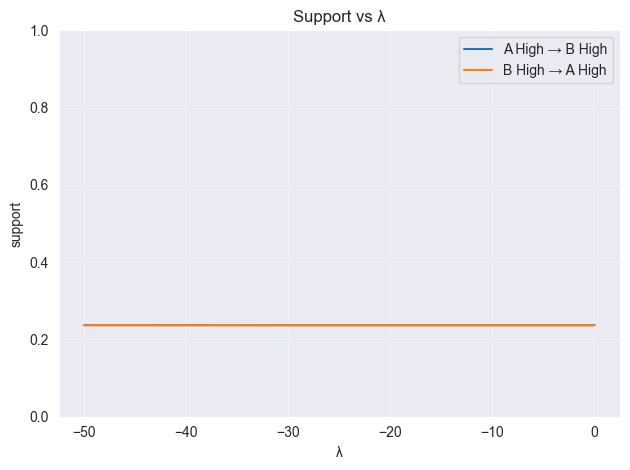

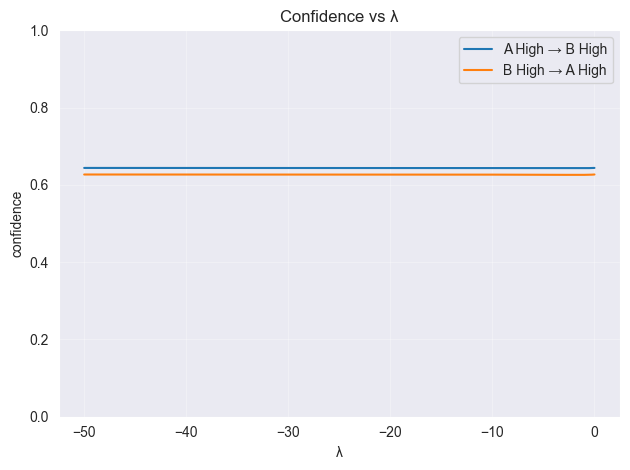

In [4]:
import FIRM.base.ct_fuzzy_rule as fuzzy_rule
import numpy as np
import matplotlib.pyplot as plt


rule1 = fuzzy_rule.CRFuzzyRule([(0, 2), (1, 2)])
rule2 = fuzzy_rule.CRFuzzyRule([(1, 2), (0, 2)])

def eval_rules_at_p(p, dataset, fuzzy_dataset):
    I = lambda x, y: implications.ImplicationsExamples.get_fuzzy_implication(implications.ImplicationsExamples.KSS)(x, y, p)
    T = lambda x, y: tnorms.TnormsExamples.get_tnorm(tnorms.TnormsExamples.SCHWEIZER_SKLAR)(x, y, p)
    rule1.evaluate_rule_database(dataset, fuzzy_dataset, T, I)
    rule2.evaluate_rule_database(dataset, fuzzy_dataset, T, I)
    return {
        "p": p,
        "supp_r1": rule1.fsupport(),
        "supp_r2": rule2.fsupport(),
        "conf_r1": rule1.fconfidence(),
        "conf_r2": rule2.fconfidence(),
    }

# Sweep only positive p values, finer resolution
p_values = np.linspace(-50, 0.01, 200)

traj = [eval_rules_at_p(p, dataset, fuzzy_dataset) for p in p_values]

p_arr = np.array([t["p"] for t in traj])
supp_r1 = np.array([t["supp_r1"] for t in traj])
supp_r2 = np.array([t["supp_r2"] for t in traj])
conf_r1 = np.array([t["conf_r1"] for t in traj])
conf_r2 = np.array([t["conf_r2"] for t in traj])

# ---- plots ----
plt.figure()
plt.plot(p_arr, supp_r1, label="A High → B High")
plt.plot(p_arr, supp_r2, label="B High → A High")
plt.xlabel("λ")
plt.ylabel("support")
plt.title("Support vs λ")
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1) 
plt.tight_layout()

plt.figure()
plt.plot(p_arr, conf_r1, label="A High → B High")
plt.plot(p_arr, conf_r2, label="B High → A High")
plt.xlabel("λ")
plt.ylabel("confidence")
plt.title("Confidence vs λ")
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1) 
plt.tight_layout()

plt.show()

In [5]:
def eval_rules_at_T_I(T,I, dataset, fuzzy_dataset):
    rule1.evaluate_rule_database(dataset, fuzzy_dataset, T, I)
    rule2.evaluate_rule_database(dataset, fuzzy_dataset, T, I)
    return {
        "supp_r1": rule1.fsupport(),
        "supp_r2": rule2.fsupport(),
        "conf_r1": rule1.fconfidence(),
        "conf_r2": rule2.fconfidence(),
    }


In [6]:
I = implications.ImplicationsExamples.get_fuzzy_implication(implications.ImplicationsExamples.IGNORE)
T = tnorms.TnormsExamples.get_tnorm(tnorms.TnormsExamples.PRODUCT)
eval_rules_at_T_I(T,I, dataset, fuzzy_dataset)

{'supp_r1': 0.23345738649368286,
 'supp_r2': 0.23345738649368286,
 'conf_r1': 0.6340769340307082,
 'conf_r2': 0.6173134905751122}

In [7]:
I = implications.ImplicationsExamples.get_fuzzy_implication(implications.ImplicationsExamples.LUKASIEWICZ)
T = tnorms.TnormsExamples.get_tnorm(tnorms.TnormsExamples.LUKASIEWICZ)
eval_rules_at_T_I(T,I, dataset, fuzzy_dataset)

{'supp_r1': 0.23708012700080872,
 'supp_r2': 0.23708012700080872,
 'conf_r1': 0.6439164042061973,
 'conf_r2': 0.6268928292222845}

In [8]:
data = dataset.copy()
for i in range(len(fuzzy_dataset.fv_list)):
    DictLabels = {x: index for index, x in enumerate(fuzzy_dataset.fv_list[i].get_labels, start=0)}
    data[dataset.columns[i]] = dataset[dataset.columns[i]].map(
        lambda x: DictLabels[fuzzy_dataset.fv_list[i].eval_max_fuzzy_set(x)])

In [9]:
# One-hot encode
df_encoded = pd.get_dummies(data, columns=["A", "B"])
print("\nOne-hot encoded df:")
print(df_encoded)


One-hot encoded df:
       A_0    A_1    A_2    B_0    B_1    B_2
0    False   True  False   True  False  False
1    False  False   True  False  False   True
2    False  False   True  False  False   True
3    False   True  False  False   True  False
4     True  False  False  False  False   True
..     ...    ...    ...    ...    ...    ...
995   True  False  False  False   True  False
996  False  False   True  False  False   True
997   True  False  False   True  False  False
998  False  False   True  False   True  False
999  False   True  False   True  False  False

[1000 rows x 6 columns]


In [10]:
from mlxtend.frequent_patterns import apriori, association_rules
df = apriori(df_encoded, min_support = 0.2, use_colnames = True, verbose = 1)
df_ar = association_rules(df, metric = "confidence", min_threshold = 0.6)
df_ar

Processing 30 combinations | Sampling itemset size 2


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(A_2),(B_2),0.365,0.379,0.234,0.641096,1.691546,1.0,0.095665,1.730267,0.643819,0.458824,0.422055,0.629255
1,(B_2),(A_2),0.379,0.365,0.234,0.617414,1.691546,1.0,0.095665,1.659759,0.658333,0.458824,0.397503,0.629255


In [11]:
from FIRM.methods.AARFI import AARFI
I = implications.ImplicationsExamples.get_fuzzy_implication(implications.ImplicationsExamples.IGNORE)
T = lambda x,y: np.minimum(x,y)

rules = AARFI(dataset, fuzzy_dataset, T, I, min_cov=0.1, min_supp=0.1, min_conf=0.4, max_feat=3)
measures = rules.measures(fuzzy_dataset)
measures

,sentence_rule,num_features,fcoverage,fsupport,fconfidence,fwracc
0,IF ( A IS H ) THEN B IS H,1,0.368185,0.237080,0.643916,0.097839
1,IF ( B IS H ) THEN A IS H,1,0.378183,0.237080,0.626893,0.097839
2,IF ( A IS M ) THEN B IS L,1,0.250279,0.143435,0.573101,0.051208
3,IF ( B IS L ) THEN A IS L,1,0.368497,0.200259,0.543448,0.059664
4,IF ( A IS L ) THEN B IS L,1,0.381536,0.200259,0.524876,0.059664
5,IF ( B IS M ) THEN A IS L,1,0.253320,0.110608,0.436635,0.013957
